# Reproducibility Study of “Studying How to Efficiently and Effectively Guide Models with Explanations”

Description: This file is part of a project aiming to reproduce the study titled "Studying How to Efficiently and 
Effectively Guide Models with Explanations." The project focuses on verifying the results and methodologies 
proposed in the original study, and potentially extending or refining the study's findings.

Based on the code of orginal paper: https://github.com/sukrutrao/Model-Guidance

### 1. Load the data

#### For VOC2007

In [5]:
import argparse

from datasets.VOC2007.preprocess import preprocess_voc2007

data_root = "datasets/VOC2007/"
split = "train"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

preprocess_voc2007(args)

100%|██████████| 2501/2501 [00:08<00:00, 297.62it/s]


In [ ]:
import argparse

from datasets.VOC2007.preprocess import preprocess_voc2007

data_root = "datasets/VOC2007/"
split = "val"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

preprocess_voc2007(args)

In [ ]:
import argparse

from datasets.VOC2007.preprocess import preprocess_voc2007

data_root = "datasets/VOC2007/"
split = "test"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

preprocess_voc2007(args)

### For waterbirds

In [6]:
import argparse  

from datasets.WATERBIRDS.preprocess import preprocess_waterbirds

bounding_boxes_path = "./datasets/WATERBIRDS/bounding_boxes.txt"
waterbirds_dataset_root = "./datasets/WATERBIRDS/waterbird_1.0_forest2water2/"
split = "train"
save_path = "./datasets/WATERBIRDS/processed/"

args = {
    "bounding_boxes_path": bounding_boxes_path,
    "waterbirds_dataset_root": waterbirds_dataset_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

preprocess_waterbirds(args)

torch.Size([4795, 2])


100%|██████████| 4795/4795 [00:18<00:00, 255.97it/s]


Total num of images in set: 4795


In [ ]:
import argparse

from datasets.WATERBIRDS.preprocess import preprocess_waterbirds

bounding_boxes_path = "./datasets/WATERBIRDS/bounding_boxes.txt"
waterbirds_dataset_root = "./datasets/WATERBIRDS/waterbird_1.0_forest2water2/"
split = "val"
save_path = "./datasets/WATERBIRDS/processed/"

args = {
    "bounding_boxes_path": bounding_boxes_path,
    "waterbirds_dataset_root": waterbirds_dataset_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

preprocess_waterbirds(args)

In [ ]:
import argparse

from datasets.WATERBIRDS.preprocess import preprocess_waterbirds

bounding_boxes_path = "./datasets/WATERBIRDS/bounding_boxes.txt"
waterbirds_dataset_root = "./datasets/WATERBIRDS/waterbird_1.0_forest2water2/"
split = "test"
save_path = "./datasets/WATERBIRDS/processed/"

args = {
    "bounding_boxes_path": bounding_boxes_path,
    "waterbirds_dataset_root": waterbirds_dataset_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

preprocess_waterbirds(args)

### 2. Train the baseline model

Train the baseline model using the training data for 2 epochs and a batch size of 16

In [ ]:
import argparse

from train import main

model_backbone = "vanilla"
total_epochs = 2
learning_rate = 1e-4
log_path = "./base_logs_demo"
save_path = "./BASE_DEMO"
train_batch_size = 16
dataset = "VOC2007"

# Default values
seed = 0
model_path = None
data_path = "datasets/"
localization_loss_lambda = 1.0
layer = "Input"
localization_loss_fn = None
attribution_method = None
optimize_explanations = False
min_fscore = -1
pareto = False
annotated_fraction = 1.0
evaluation_frequency = 1
eval_batch_size = 4
box_dilation_percentage = 0
pareto_metric = "EPG_IOU"

args = {
    "model_backbone": model_backbone,
    "total_epochs": total_epochs,
    "learning_rate": learning_rate,
    "log_path": log_path,
    "save_path": save_path,
    "seed": seed,
    "train_batch_size": train_batch_size,
    "dataset": dataset,
    "model_path": model_path,
    "data_path": data_path,
    "localization_loss_lambda": localization_loss_lambda,
    "layer": layer,
    "localization_loss_fn": localization_loss_fn,
    "attribution_method": attribution_method,
    "optimize_explanations": optimize_explanations,
    "min_fscore": min_fscore,
    "pareto": pareto,
    "annotated_fraction": annotated_fraction,
    "evaluation_frequency": evaluation_frequency,
    "eval_batch_size": eval_batch_size,
    "box_dilation_percentage": box_dilation_percentage,
    "pareto_metric": pareto_metric
}

args = argparse.Namespace(**args)

main(args)

### 3. Train the fine-tuned model on the base model

For the fine-tuned model, due to computational resource limitation, we only train on 2 epochs and a batch size of 16.

In [ ]:
import argparse

from train import main

model_backbone = "vanilla"
total_epochs = 2
learning_rate = 1e-4
log_path = "./finetune_logs_demo"
save_path = "./FT_DEMO"
train_batch_size = 16
dataset = "VOC2007"

model_path = "./BASE_DEMO/VOC2007/vanilla_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput/model_checkpoint_f1_best.pt"

# Default values
seed = 0
data_path = "datasets/"
localization_loss_lambda = 1e-3
layer = "Final"
localization_loss_fn = "Energy"
attribution_method = "IxG"
optimize_explanations = True
min_fscore = -1
pareto = True
annotated_fraction = 1.0
evaluation_frequency = 1
eval_batch_size = 4
box_dilation_percentage = 0
pareto_metric = "EPG_IOU"

args = {
    "model_backbone": model_backbone,
    "total_epochs": total_epochs,
    "learning_rate": learning_rate,
    "log_path": log_path,
    "save_path": save_path,
    "seed": seed,
    "train_batch_size": train_batch_size,
    "dataset": dataset,
    "model_path": model_path,
    "data_path": data_path,
    "localization_loss_lambda": localization_loss_lambda,
    "layer": layer,
    "localization_loss_fn": localization_loss_fn,
    "attribution_method": attribution_method,
    "optimize_explanations": optimize_explanations,
    "min_fscore": min_fscore,
    "pareto": pareto,
    "annotated_fraction": annotated_fraction,
    "evaluation_frequency": evaluation_frequency,
    "eval_batch_size": eval_batch_size,
    "box_dilation_percentage": box_dilation_percentage,
    "pareto_metric": pareto_metric
}

args = argparse.Namespace(**args)

main(args)

### 4. Evaluate the fine-tuned model on the test set

In [ ]:
from eval import evaluation_function

model_path = './FT_DEMO/VOC2007/vanilla_finetunedobjlocpareto_attrIxG_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.001_layerFinal/model_checkpoint_f1_best.pt'

split = 'test'

mode = 'bbs'

dataset = 'VOC2007'

# Create kwargs for evaluation function
args = {'model_path': model_path,
        'split': split,
        'mode': mode,
        'dataset': dataset}

# Evaluate
evaluation_function(**args)

### 5. Visualize the different attribution methods

In [ ]:
import torch
torch.cuda.empty_cache()

from visualize import visualize_fig9

visualize_fig9(
    [
        "BASE/VOC2008/bcos_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossL1_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.01_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossPPCE_origmodel_checkpoint_f1_best.pt_resnet50_lr0.001_sll0.001_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossRRR_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll5e-05_layerInput/model_checkpoint_f1_best.pt",
    ],
    last=False
)

### 6. Visualize the model with dilated bounding boxes

In [ ]:
import torch
torch.cuda.empty_cache()

from visualize import visualize_fig11

visualize_fig11(
    base_path="BASE/VOC2008/bcos_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput/model_checkpoint_f1_best.pt",
    energy_paths=[
        "FT/DIL/bcos_finetunedobjlocpareto_attrBCos_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput/model_checkpoint_f1_best.pt",
        "FT/DIL/bcos_FT_dilated_attrBCos_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput_dil0.5/model_checkpoint_f1_best.pt",
    ],
    L1_paths=[
        "FT/DIL/bcos_finetunedobjlocpareto_attrBCos_loclossL1_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput/model_checkpoint_f1_best.pt",
        "FT/DIL/bcos_FT_dilated_attrBCos_loclossL1_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput_dil0.5/model_checkpoint_f1_best.pt",
    ],
    last=False
    )

### 7. Show that the Pareto Front works

In [ ]:
from pareto_FT import pareto_demo

bin_width=0.005,
layer="Final"
data_split="test"
attribution_method="BCos"
eval_batch_size=4
model_dir="./FT/VOC2007/bcos/fin/l1/bcos_finetunedobjlocpareto_attrBCos_loclossL1_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerFinal/pareto_front"
output_dir="./p_curves_demo/VOC2007/bcos/Final/L1"

pareto_demo(
    bin_width=bin_width,
    layer=layer,
    data_split=data_split,
    attribution_method=attribution_method,
    eval_batch_size=eval_batch_size,
    model_dir=model_dir,
    output_dir=output_dir
)

[(79.46498990058899, 64.57726532228821), (79.53389883041382, 67.48056483271222), (79.7851026058197, 57.8344636322933), (79.84963655471802, 53.66749359657786), (79.86577153205872, 61.88609856665165), (80.18531799316406, 61.09788756440639)]


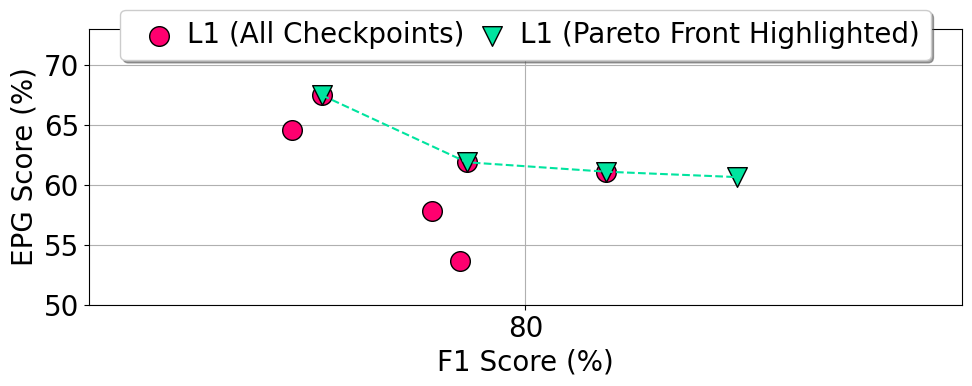

In [14]:
from utils import *
from visualize import *

root_folder = './p_curves_demo/VOC2007/bcos/Final/L1/pareto'
data_f1_epg_pareto = utils.load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'bb_score'))

root_folder = './p_curves_demo/VOC2007/bcos/Final/L1/not_pareto'
data_f1_epg_not_pareto = utils.load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'bb_score'))

print(data_f1_epg_not_pareto['bcos']['final']['l1'])

plot_pareto_curve(
    baseline_data=data_f1_epg_pareto['vanilla']['input']['baseline'],
    l1_data=data_f1_epg_pareto['bcos']['final']['l1'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=(79, 81),
    set_ylim=(50, 73),
    hide_x_ticks=False,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG",
    plot_demo_data=True,
    demo_data=data_f1_epg_not_pareto['bcos']['final']['l1'])

### 8. Show the evaluation results of the fine-tuned model (Pareto front)

In [ ]:
from utils import *
from visualize import *

root_folder = './p_curves/VOC2007'
data_f1_epg = utils.load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'bb_score'))

x_lim_range = (65, 85)
y_lim_range = (31, 90)
step_size_xticks = 5
step_size_yticks = 10

plot_pareto_curve(
    baseline_data=data_f1_epg['vanilla']['input']['baseline'],
    energy_data=data_f1_epg['vanilla']['input']['energy'],
    l1_data=data_f1_epg['vanilla']['input']['l1'],
    ppce_data=data_f1_epg['vanilla']['input']['ppce'],
    rrr_data=data_f1_epg['vanilla']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_epg['bcos']['input']['baseline'],
    energy_data=data_f1_epg['bcos']['input']['energy'],
    l1_data=data_f1_epg['bcos']['input']['l1'],
    ppce_data=data_f1_epg['bcos']['input']['ppce'],
    rrr_data=data_f1_epg['bcos']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

plot_pareto_curve(
    baseline_data=data_f1_epg['vanilla']['final']['baseline'],
    energy_data=data_f1_epg['vanilla']['final']['energy'],
    l1_data=data_f1_epg['vanilla']['final']['l1'],
    ppce_data=data_f1_epg['vanilla']['final']['ppce'],
    rrr_data=data_f1_epg['vanilla']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=False,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_epg['bcos']['final']['baseline'],
    energy_data=data_f1_epg['bcos']['final']['energy'],
    l1_data=data_f1_epg['bcos']['final']['l1'],
    ppce_data=data_f1_epg['bcos']['final']['ppce'],
    rrr_data=data_f1_epg['bcos']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=(step_size_yticks),
    hide_x_ticks=False,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")